In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the historical dataset you created
df_historical = pd.read_csv('..\data\df_historical.csv', index_col='Date', parse_dates=True)
rh_cols = ['RH_mean', 'RH_min', 'RH_max']

print("--- Data Cleaning for RH Features ---")

--- Data Cleaning for RH Features ---


In [4]:
# Step 1: Invalidate all values outside the physical range [0, 100] by replacing them with NaN
# We'll count how many values are being corrected.
invalid_values = (df_historical[rh_cols] < 0) | (df_historical[rh_cols] > 100)
print(f"Found and ready to invalidate {invalid_values.sum().sum()} impossible RH values.")

df_historical[invalid_values] = np.nan
print("-> Impossible values have been replaced with NaN.")

Found and ready to invalidate 4 impossible RH values.
-> Impossible values have been replaced with NaN.


In [5]:
# Step 2: Impute the missing values using time-based interpolation
# This will fill the NaNs we just created with realistic estimates.
print("\nInterpolating the invalidated data points...")
df_historical[rh_cols] = df_historical[rh_cols].interpolate(method='time')
print("-> Interpolation complete.")


Interpolating the invalidated data points...
-> Interpolation complete.


In [6]:
# Step 3: Verify the cleaning process
print("\n--- Verification: New Summary Statistics for RH Features ---")
# The min should now be >= 0 and the max should be <= 100.
print(df_historical[rh_cols].describe())


--- Verification: New Summary Statistics for RH Features ---
           RH_mean       RH_min       RH_max
count  9422.000000  9422.000000  9422.000000
mean     77.059807    65.267183    87.920844
std      11.047639    15.383005    10.664187
min      28.900000    10.200000    30.300000
25%      72.000000    55.367500    82.600000
50%      79.350000    67.700000    90.800000
75%      84.547187    76.700000    96.400000
max     100.000000   100.000000   100.000000



--- Re-visualizing Cleaned Data ---


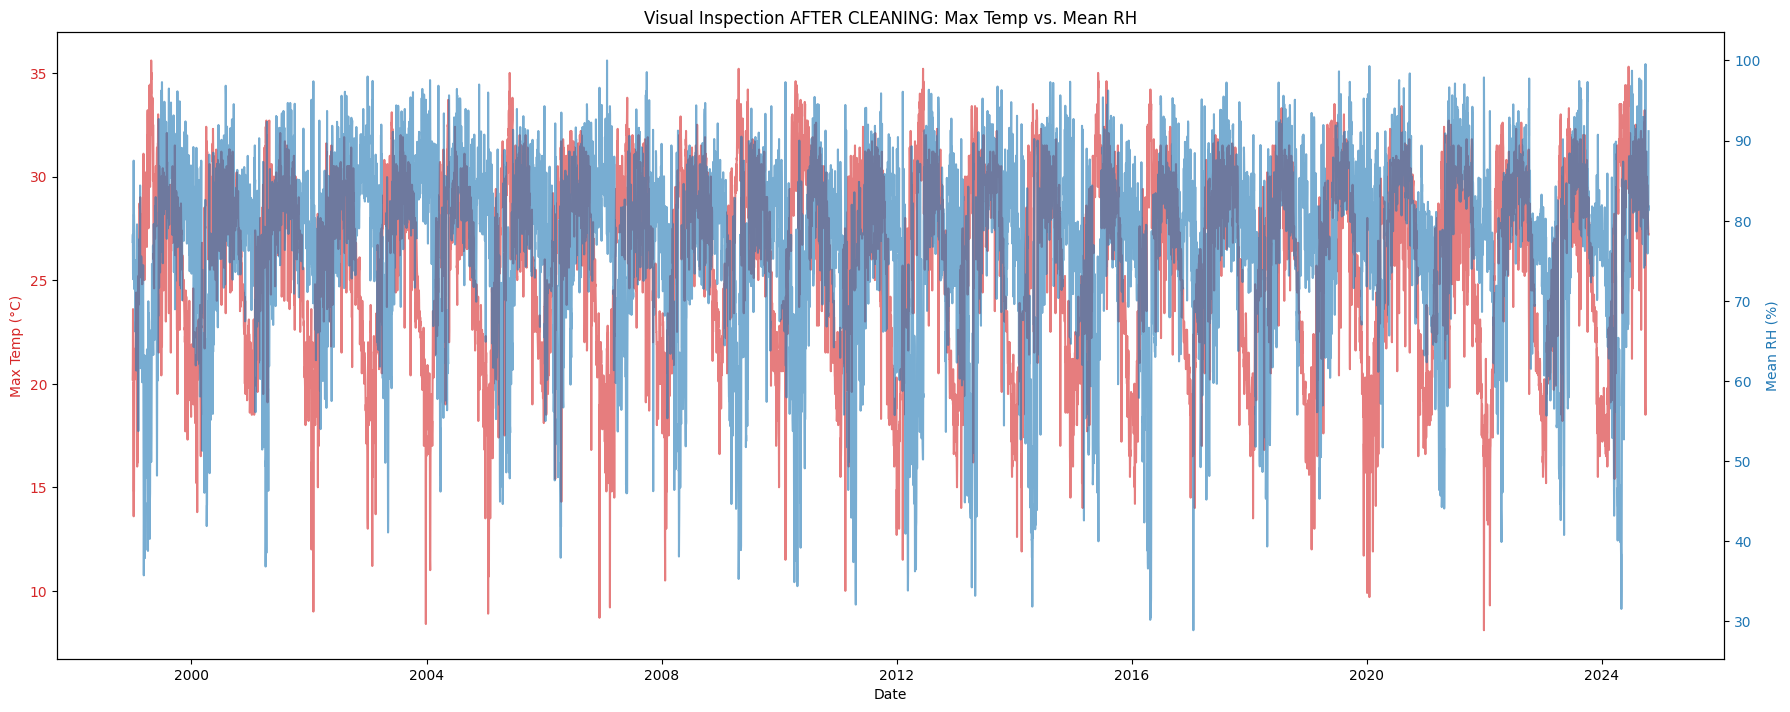

In [7]:
# Step 4: Re-visualize the cleaned data
print("\n--- Re-visualizing Cleaned Data ---")
fig, ax1 = plt.subplots(figsize=(18, 7))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Max Temp (°C)', color=color)
ax1.plot(df_historical.index, df_historical['Max_Temp_C'], color=color, alpha=0.6, label='Max Temp')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Mean RH (%)', color=color)
ax2.plot(df_historical.index, df_historical['RH_mean'], color=color, alpha=0.6, label='Mean RH')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Visual Inspection AFTER CLEANING: Max Temp vs. Mean RH')
plt.show()

In [9]:
# Save the cleaned dataframe over the old one
df_historical.to_csv('..\data\df_historical.csv')